This template is for the long, short, computational, and flexible lab reports for PHYS3112. I.e., everything apart from the final report.

To use it, open this template on your computer, File -> Save as to change its name, delete this first cell, and then edit the remaining cells appropriately.

When being marked by the demonstrator, you need to show them this Jupyter Notebook (either on a computer, or on paper) as well as your paper-based laboratory notebook.

Checklist of minimum requirements for the lab report:

1. __Uncertainties__ must be given for all data taken, with an explanation of how the uncertainties were estimated and calculated. Calculations should correctly account for correlated/uncorrelated errors. You should discuss the dominant error sources. __Significant figures__ should be used appropriately.

2. You must have your __paper-based laboratory notebook__ with you. The __raw data__ should be in there, along with __contemporaneous notes__ that you took.

3. You must use __Jupyter Notebook__ for the report. Likely based on this template.

4. The __Abstract, Aim, and Conclusion__ should be appropriate and well written.

5. __Harvard referencing__ style must be used throughout.

6. Any __lab prework__ needs to be in your paper-based laboratory notebook or included in this Jupyter Notebook.

From the notes on Moodle:

* We want a __concise report__ that is consistent with the roughly 15 hours per week that you should be spending on the course. If you do get enthusiastic about an experiment and want to spend more time on the report, that is OK, but it will have negligible effect on your marks for the non-final report experiments.

* __Do not spend hours__ neatly formatting your report, copying out your lab notebooks in perfect copperplate, etc.

* You do not need to complete all parts of an experiment.  However, as a guide you should try to __do a reasonable number__ of the things listed in the Laboratory Experiments Summaries document on Moodle. We don't define reasonable. Use your judgement based on the 15 hours per week that the course should require.


# Gamma ray spectroscopy

A. Student (z1234567)

## Abstract

Put a succinct (1-2 sentence statement) of the aim in here, followed by a succinct (1-2 sentence statement) of your key conclusion(s). That is all, keep it simple, so a reader can quickly get at your two key points. But do have a reasonable aim, not just "To investigate gamma ray spectroscopy".

## Introduction

This is where you can have some discussion of the general background of the experiment. However, don't just type in text from the student notes. If you don't have anything to add beyond the student notes, you can leave this section blank. 

The following text is just to give you some examples of referencing style and how to type equations.

Hello, here's a citation (Persson et al., 2010), and a little equation:

\begin{equation}
\label{eqn1}
E = mc^2 \tag{1}
\end{equation}

Here's how to typeset a long equation, and another citation (Parthasarathy and Groves, 2004):

\begin{eqnarray}
\label{eqn2} I_{o} = \sin^{2}\left(\frac{2\pi}{\lambda_{ex}}\left(n_{o}(z_{o}-z_{p})+n_{w}h_{o}\right)\right)\sin^{2}\left(\frac{2\pi}{\lambda_{em}}\left((n_{o}(z_{o}-z_{p})+n_{w}h_{o}\right)\right) \tag{2}\\
\label{eqn3} I_{p} = \sin^{2}\left(\frac{2\pi}{\lambda_{ex}}(n_{o}z_{o}+n_{w}h_{o})\right)\sin^{2}\left(\frac{2\pi}{\lambda_{em}}(n_{o}z_{o}+n_{w}h_{o})\right) \tag{3}
\end{eqnarray}

Here is a reference to equation $\ref{eqn3}$. Note that LaTeX equations and labels do not always work correctly when viewing Notebooks on github; they do work if you use Jupyter Notebook on your own computer.

## Aim

This should be a succinct (1-2 sentence) statement of the aim of the experiment in your report, and should be similar to (or even be identical to) the aim you state in your abstract. It will likely not be the same as the aim in the lab documentation as it should be tailored to what you have chosen to focus on in your report and fit well to your conclusion.

## Pre-work

Most, but not all, of the lab experiments have pre-work questions for you to do. You need to answer these questions. You can write the answers in your paper-based lab notebook (which is probably the quickest approach), or here.

## Method

Briefly summarise the key aspects of the experiment that you performed; the lab documentation can be used as references. In particular, you should note any aspects that differ from or are not obvious in the lab documentation.

## Results & Analysis

The section should focus on the key aspects of your results and analysis. You do not need to be exhaustive. That said, it should tell a clear story, connect well to the figures that you present, and sensibly justify your final conclusion. Any figure that appears in the results section should be explicitly discussed as part of the results; simply dumping figures onto the page is not good form.

Here is an example of a data table:

Control rod position [mm] | Neutron flux [/s]
:---:|---:
1.0|0.0
2.0|20.0
3.0|4000.0
4.0|NO CARRIER

The following two cells show how you can include your data, analysis, and plots.

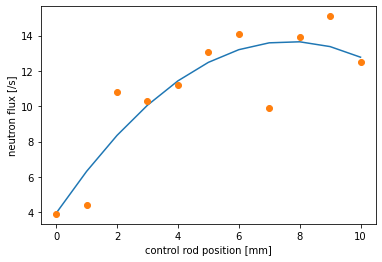

In [61]:
# An example of fitting a polynomial model to your data.

import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

# Here are 11 experimental data points.

x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1, 9.9, 13.9, 15.1, 12.5]

# Fit a polynomial to the data and plot the data and the fit.

a, b, c = (Polynomial.fit(x, y, deg=2)).convert().coef
y_fit = a + b * x + c * x**2

plt.plot(x, y_fit, '-')
plt.plot(x, y, 'o', color='tab:orange')
plt.xlabel("control rod position [mm]")
plt.ylabel("neutron flux [/s]")
plt.show()

Beta: [4.95854679 8.75651619]
Beta Std Error: [0.41920078 0.91494176]
Beta Covariance: [[ 0.23216075 -0.38968231]
 [-0.38968231  1.10593997]]
Residual Variance: 0.7569293579345008
Inverse Condition #: 0.25165281298161074
Reason(s) for Halting:
  Sum of squares convergence


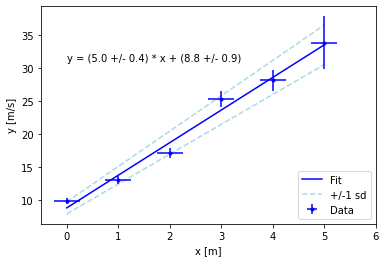

In [62]:
# An example of fitting a straight line to data points, with 
# uncertainties in both axes.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.odr import *

# Here is our experimental data, each row contains x, sx, y, sy, where (x,y) are the
# data points, and (sx, sy) are the uncertainties on the points.

data = np.array([
    [0.0, 0.25,  9.8, 0.4],
    [1.0, 0.25, 13.0, 0.6],
    [2.0, 0.25, 17.1, 0.8],
    [3.0, 0.25, 25.3, 1.2],
    [4.0, 0.25, 28.2, 1.6],
    [5.0, 0.25, 33.9, 4.0]
])

# For convenience, extract the data from the 2D numpy array into named variables.

x, sx, y, sy = data[:,0], data[:,1], data[:,2], data[:,3]

# Here is our straight line fitting function.

def func(parameters, x):
    m, c = parameters
    return m * x + c

# Fit the function using ODR.

model = Model(func)
odr = ODR(RealData(x, y, sx = sx, sy = sy), model, beta0 = [4, 10])
output = odr.run()

# Print the result of the fit, and then make some nice plots.

output.pprint()

plt.plot(x, func(output.beta, x), color='blue', label='Fit')
plt.plot(x, func(output.beta + output.sd_beta, x), '--', color='lightblue', label='+/-1 sd')
plt.plot(x, func(output.beta - output.sd_beta, x), '--', color='lightblue')
plt.errorbar(x, y, xerr = sx, yerr = sy, fmt = '.', color='blue', label = 'Data')
plt.text(0, 31, "y = ({:.1f} +/- {:.1f}) * x + ({:.1f} +/- {:.1f})".format(
  output.beta[0], output.sd_beta[0],
  output.beta[1], output.sd_beta[1]))

plt.xlabel("x [m]")
plt.ylabel("y [m/s]")
plt.xlim(-0.5, 6.0)
plt.legend(loc='lower right')
plt.show()

Some more random examples of Markdown:

* First item.

* Second item.
  * A sub-time.
  * And another one.
* Third item.

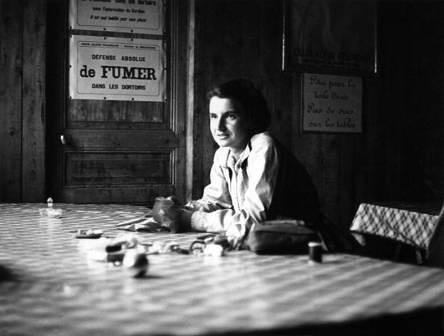

Fig. 1 | This is one way of adding a centered caption, using a table.
:---|:---
|

>             Fig.1: Here is another way of adding 
>             a caption. That allows for more text.
>             Unfortunately, captions are a bit
>             clunky in Markdown.


## Discussion

If you would like this as a section, feel free. This might be a place to distil your analysis down to some key points or make an argument with that analysis.


## Conclusions 

You should finish with a succinct (1-2 sentence) statement of your key finding(s). It should be similar to (or even be identical to) the conclusion you state in your abstract.

An example follows:

We measured the flux as (1.23 +/- 0.12) x 1E6 photons per second, which compares with the literature value of (1.362 +/- 0.006) x 1E6 (Smith et al. 2023). These two values are just outside our 1-sigma error bars. The dominant source of error was the uncertain deadtime in the photomultiplier tube, and this could be improved by making measurements at a photon rate less than 200/sec over a time period of a day or more.

---

## Acknowledgements

An optional section. You could, e.g., thank your lab partner here.

## References

M. Persson _et al._, Langmuir **26**, 9927 (2010).

R. Parthasarathy & J.T. Groves, Cell Biochem. Biophys. **41**, 391 (2004).